In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Tecnicas De Conteo

20

22 (Tambíen Computacional)

Teórico:

Teniendo en cuenta que se busca realizar la suma de 3 enteros que de 10, entonces se pueden sumar numeron que esten en el rango [0,10] Se realiza una combinación con repetición, dada por la siguiente fórmula:

$$
C_{r}^{n} = \binom{n+r-1}{r}
$$

Siendo $r$ la cantidad de particiones entre los números que podemos elegir (al tener 3 enteros, hay 2 particiones entre ellos) y $n$ la cantidad de números de los que se pueden elegir (en este caso 11). De modo que se tiene:

$$
C_{2}^{11} = \binom{11+2-1}{2} = \binom{12}{2}\\
= \frac{12!}{2! (11-1)!}= \frac{479001600}{2(3628800)}=\frac{479001600}{7257600}=66
$$


Computacional:

In [2]:
num=np.array([0,1,2,3,4,5,6,7,8,9,10])
count=0

for i in range(len(num)):
    for j in range(len(num)):
        for k in range(len(num)):
            suma=i+j+k
            if suma==10:
                count+=1
                
count

66

23

## Generales de Probabilidad

4

In [6]:
n=np.arange(1,81)
prob=np.zeros(80)
count=0
d=365
for i in n:
    f_i=(d-i+1)/d
    prob[count]=f_i
    count+=1
    
prob
    

array([1.        , 0.99726027, 0.99452055, 0.99178082, 0.9890411 ,
       0.98630137, 0.98356164, 0.98082192, 0.97808219, 0.97534247,
       0.97260274, 0.96986301, 0.96712329, 0.96438356, 0.96164384,
       0.95890411, 0.95616438, 0.95342466, 0.95068493, 0.94794521,
       0.94520548, 0.94246575, 0.93972603, 0.9369863 , 0.93424658,
       0.93150685, 0.92876712, 0.9260274 , 0.92328767, 0.92054795,
       0.91780822, 0.91506849, 0.91232877, 0.90958904, 0.90684932,
       0.90410959, 0.90136986, 0.89863014, 0.89589041, 0.89315068,
       0.89041096, 0.88767123, 0.88493151, 0.88219178, 0.87945205,
       0.87671233, 0.8739726 , 0.87123288, 0.86849315, 0.86575342,
       0.8630137 , 0.86027397, 0.85753425, 0.85479452, 0.85205479,
       0.84931507, 0.84657534, 0.84383562, 0.84109589, 0.83835616,
       0.83561644, 0.83287671, 0.83013699, 0.82739726, 0.82465753,
       0.82191781, 0.81917808, 0.81643836, 0.81369863, 0.8109589 ,
       0.80821918, 0.80547945, 0.80273973, 0.8       , 0.79726

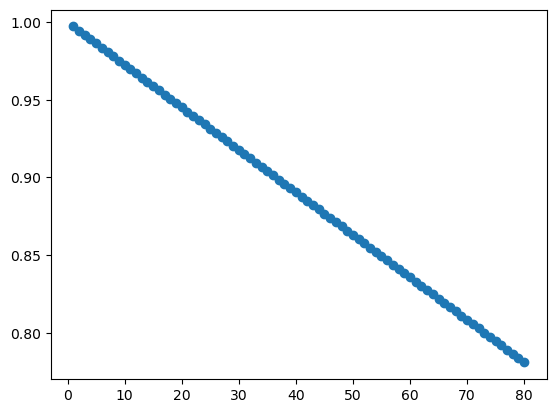

In [5]:

plt.scatter(n,prob)

9

12

## Distribuciones Discretas de Probabilidad

3

4

## Distribuciones Contínuas de Probabilidad

1 

4

## Metropolis Hasting

1

3

4

## Parameter Estimation

3

5